In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [10]:
dataset =pd.read_csv("/content/Train.csv")

def analyze(file):

    # Display the shape of the dataset
    print("------Data Shape-----\n\n", dataset.shape)

    # Display the first few rows of the dataset
    print("\n\n-----Data head----- \n\n", dataset.head())

    # Display information about the dataset
    print("\n\n\n-----Data information-----\n")
    print(dataset.info())

    # Display the size of the dataset
    print("\n\n\n Data size :>>>>> ", dataset.size)

    # Display the column names of the dataset
    print("\n\n-----Column names----\n\n", dataset.columns)

    # Display descriptive statistics of the dataset
    print("\n\n-----Descriptive statistics----\n\n")                            #my favorite
    print(dataset.describe(include="all"))

    # Count the number of missing values in each column
    missing_values = dataset.isnull().sum()
    print("\n-----Missing Values-----\n", missing_values)


analyze('/content/Train.csv')




------Data Shape-----

 (8523, 12)


-----Data head----- 

   Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   

In [19]:
#this can be used in vizualization
value_counts_dict={}
def item():


  for value in dataset['Item_Type']:
      if value not in value_counts_dict:
          value_counts_dict[value] = 1
      else:
          value_counts_dict[value] += 1
  return value_counts_dict


item()

dict

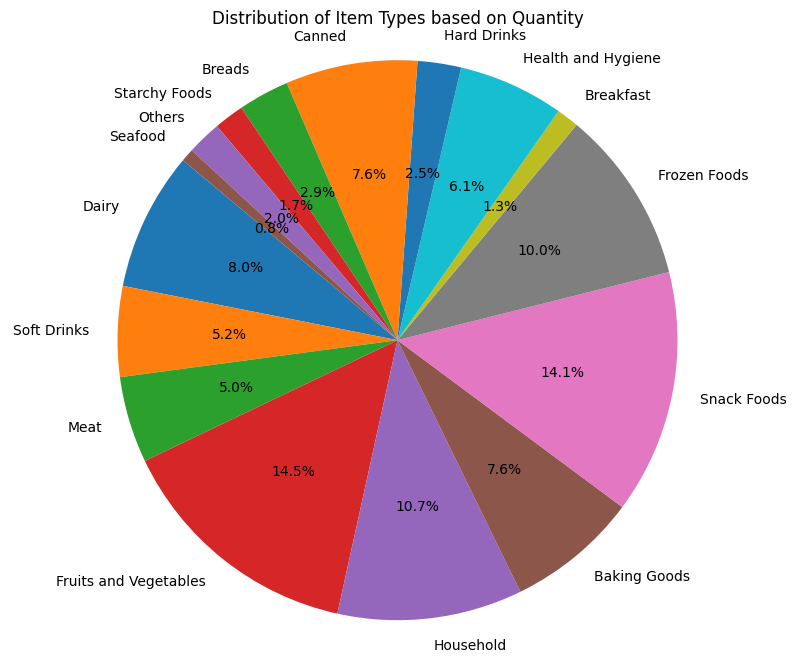

In [43]:


# Given dictionary of item types and quantities
item_type_quantity ={
    'Dairy': 682,
    'Soft Drinks': 445,
    'Meat': 425,
    'Fruits and Vegetables': 1232,
    'Household': 910,
    'Baking Goods': 648,
    'Snack Foods': 1200,
    'Frozen Foods': 856,
    'Breakfast': 110,
    'Health and Hygiene': 520,
    'Hard Drinks': 214,
    'Canned': 649,
    'Breads': 251,
    'Starchy Foods': 148,
    'Others': 169,
    'Seafood': 64
}

# Convert dictionary keys (item types) and values (quantities) into lists
item_types = list(item_type_quantity.keys())
quantities = list(item_type_quantity.values())
explode = [0,0,0.1,0,0]
# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(quantities, labels=item_types, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Item Types based on Quantity')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()




In [42]:
#years of establishment
# import operator
import plotly.express as px

establishment = {}

for i in dataset['Outlet_Establishment_Year']:
  if i not in establishment:
    establishment[i]=1
  else :
    establishment[i] +=1
#print (establishment)

# Convert the dictionary to a DataFrame
data = pd.DataFrame({'Year of Establishment': list(establishment.keys()), 'Quantity': list(establishment.values())})

# Create an interactive bar plot using Plotly Express
fig = px.bar(data, x='Year of Establishment', y='Quantity', title='Distribution of Years of Establishment')
fig.update_layout(xaxis_title='Year of Establishment', yaxis_title='Quantity')

# Add hover information for x and y
fig.update_traces(hovertemplate="Year: %{x}<br>Quantity: %{y}")

# Show the plot
fig.show()
